Load Clustering Using K-Means Algorithm
(Note: Meter data needs to be imported prior to clustering.)

In [1]:
import os, sys
PWD = os.getenv('PWD')
os.chdir(PWD)
sys.path.insert(0, os.getenv('PWD'))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings.py")
import django
django.setup()

In [2]:
from beo_datastore.libs.clustering import KMeansLoadClustering
from beo_datastore.libs.intervalframe import ValidationFrame288
from beo_datastore.libs.plot_intervalframe import plot_frame288, plot_many_frame288s

from load.customer.models import Meter

In [3]:
# Configure Clustering
normalize = False
number_of_clusters = 6
# choices are "average_frame288", "minimum_frame288", "maximum_frame288", "total_frame288", "count_frame288"
frame288_type = "maximum_frame288"

# Get NEM meters (meters with export channel only)
meters = Meter.objects.filter(channels__export=True)

# run K-Means clustering algorithm
load_clustering = KMeansLoadClustering(
    objects=meters,
    frame288_type=frame288_type,
    number_of_clusters=number_of_clusters,
    normalize=normalize
)

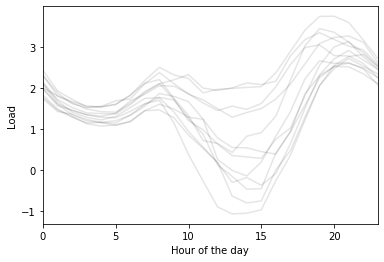

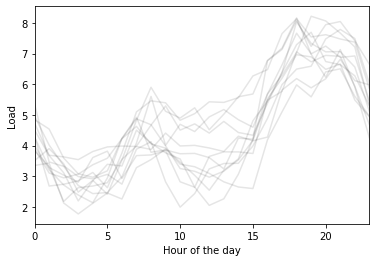

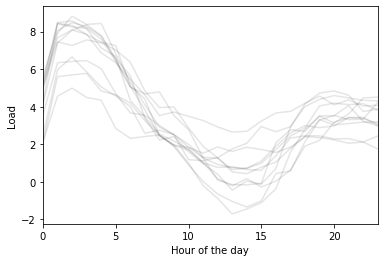

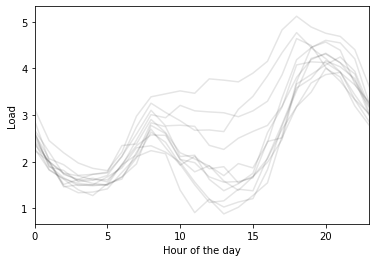

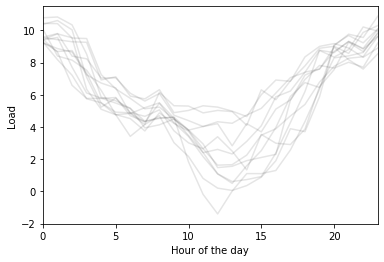

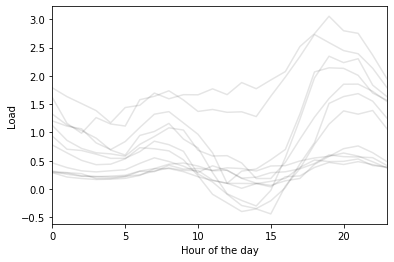

In [4]:
# plot reference load cluster

for i in sorted(set(load_clustering.cluster_labels)):
    plot_frame288(load_clustering.get_reference_frame288_by_cluster_id(i))

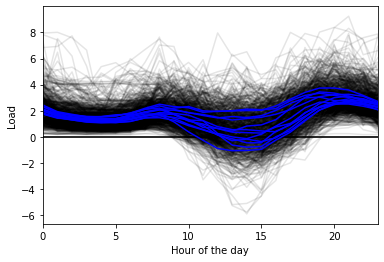

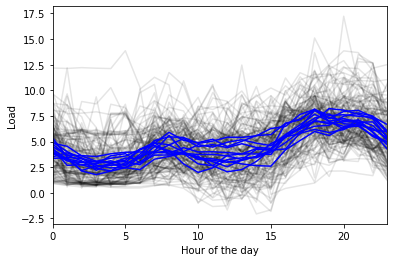

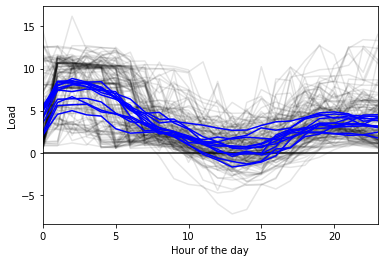

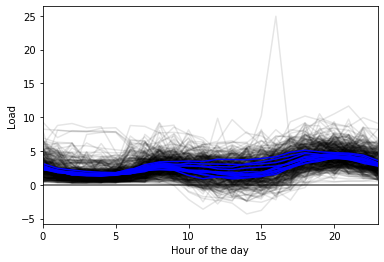

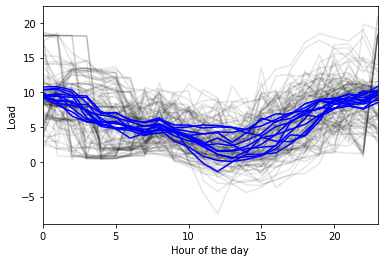

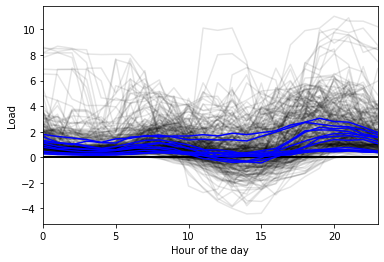

In [5]:
# plot matching load clusters against reference

for i in sorted(set(load_clustering.cluster_labels)):
    plot_many_frame288s(
        load_clustering.get_cluster_frame288s_by_cluster_id(i),
        load_clustering.get_reference_frame288_by_cluster_id(i)
    )